### ws01

In [191]:
import pandas as pd
# import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

cols = ['preg', 'plas', 'pres', 'skin', 'insu', 'bmi', 'pedi', 'age', 'class']
df = pd.read_csv("data/pima-indians-diabetes.csv", names=cols)
print(df.shape)
df.head()

(768, 9)


,preg,plas,pres,skin,insu,bmi,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [192]:
df.describe().round(2)

,preg,plas,pres,skin,insu,bmi,pedi,age,class
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


In [193]:
df.drop('insu', axis=1, inplace=True)

df['bmi'] = df.bmi.replace(0, df.bmi.median())
df['plas'] = df.plas.replace(0, df.plas.median())
df['pres'] = df.pres.replace(0, df.pres.median())
df['skin'] = df.skin.replace(0, df.skin.median())
# df['insu'] = df.insu.replace(0, df.insu.median())

In [194]:
df.describe().round(2)

,preg,plas,pres,skin,bmi,pedi,age,class
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,121.66,72.39,27.33,32.45,0.47,33.24,0.35
std,3.37,30.44,12.10,9.23,6.88,0.33,11.76,0.48
min,0.00,44.00,24.00,7.00,18.20,0.08,21.00,0.00
25%,1.00,99.75,64.00,23.00,27.50,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,67.10,2.42,81.00,1.00


In [195]:
X = df.drop('class', axis=1) #.copy()
y = df['class']
print(y.unique()) 

[1 0]


## Decision Tree

In [196]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='entropy', max_depth=None) 
# model = DecisionTreeClassifier(criterion='gini', max_depth=None)  

cvs = cross_val_score(model, X, y, cv=10)  

print('cross val scores {}'.format(cvs.round(2)))
print('Average (%) = {:.2f}' .format(cvs.mean() * 100))

cross val scores [0.68 0.79 0.7  0.61 0.7  0.73 0.78 0.73 0.71 0.68]
Average (%) = 71.09


In [197]:
model

DecisionTreeClassifier(criterion='entropy')

In [198]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='gini', max_depth=None) 
# model = DecisionTreeClassifier(criterion='gini', max_depth=None)  

cvs = cross_val_score(model, X, y, cv=10)  

print('cross val scores {}'.format(cvs.round(2)))
print('Average (%) = {:.2f}' .format(cvs.mean() * 100))

cross val scores [0.64 0.75 0.64 0.62 0.66 0.65 0.75 0.78 0.7  0.76]
Average (%) = 69.54


## ws02

In [199]:

from sklearn.preprocessing import MinMaxScaler as Scaler

X = X.astype('float64')

sc = Scaler()   
X_sc = sc.fit_transform(X)

df_sc = pd.DataFrame(X_sc, columns=X.columns)
df_sc.head()

,preg,plas,pres,skin,bmi,pedi,age
0,0.352941,0.670968,0.489796,0.304348,0.314928,0.234415,0.483333
1,0.058824,0.264516,0.428571,0.239130,0.171779,0.116567,0.166667
2,0.470588,0.896774,0.408163,0.173913,0.104294,0.253629,0.183333
3,0.058824,0.290323,0.428571,0.173913,0.202454,0.038002,0.000000
4,0.000000,0.600000,0.163265,0.304348,0.509202,0.943638,0.200000


In [200]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


In [201]:
models = []
models.append(('LR', LogisticRegression(solver='lbfgs')))
models.append(('kNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC(gamma='auto')))
models.append(('RFC', RandomForestClassifier(n_estimators=10)))
models.append(('DT', DecisionTreeClassifier()))


In [202]:
from sklearn.model_selection import cross_val_score

results = []
names = []

for name, model in models:
    cvs = cross_val_score(model, X_sc, y, cv=10) 
    results.append(cvs)
    names.append(name)
    print('{:4} {:.3f} ({:.3f})'.format(name, cvs.mean(), cvs.std()) )

LR   0.764 (0.030)
kNN  0.729 (0.051)
NB   0.751 (0.038)
SVC  0.771 (0.037)
RFC  0.744 (0.052)
DT   0.695 (0.060)


In [203]:
results[:6]

[array([0.75324675, 0.76623377, 0.76623377, 0.72727273, 0.75324675,
        0.79220779, 0.76623377, 0.79220779, 0.71052632, 0.81578947]),
 array([0.67532468, 0.79220779, 0.80519481, 0.67532468, 0.68831169,
        0.74025974, 0.75324675, 0.79220779, 0.69736842, 0.67105263]),
 array([0.75324675, 0.74025974, 0.75324675, 0.66233766, 0.72727273,
        0.76623377, 0.75324675, 0.81818182, 0.75      , 0.78947368]),
 array([0.74025974, 0.76623377, 0.77922078, 0.72727273, 0.74025974,
        0.80519481, 0.77922078, 0.80519481, 0.72368421, 0.84210526]),
 array([0.75324675, 0.79220779, 0.76623377, 0.64935065, 0.75324675,
        0.7012987 , 0.75324675, 0.74025974, 0.68421053, 0.84210526]),
 array([0.63636364, 0.75324675, 0.63636364, 0.58441558, 0.66233766,
        0.68831169, 0.76623377, 0.74025974, 0.72368421, 0.76315789])]

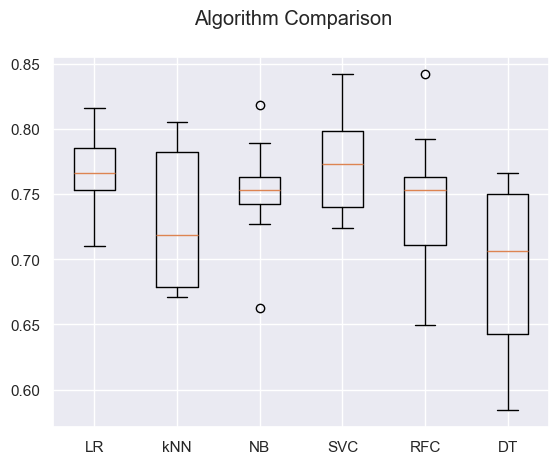

In [204]:

fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)  
plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

## ws03

In [205]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [1.0, 3.0, 5.0], 
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'shrinking': [True, False],
    'gamma': ['auto', 1, 0.1],
    'coef0': [0.0, 0.1, 0.5]
}

model = SVC()

grid_search = GridSearchCV(
    model, param_grid, cv=10, scoring='accuracy', verbose=1)
grid_search.fit(X_sc, y)

grid_search.best_score_ #, grid_search.best_estimator_

Fitting 10 folds for each of 216 candidates, totalling 2160 fits


0.7721291866028708

In [206]:
grid_search.best_params_

{'C': 3.0, 'coef0': 0.0, 'gamma': 1, 'kernel': 'rbf', 'shrinking': True}

In [207]:
grid_search.best_estimator_

SVC(C=3.0, gamma=1)

In [208]:
# print(grid_search.best_score_)
# print(grid_search.best_estimator_)
print(grid_search.best_estimator_.C)
print(grid_search.best_estimator_.kernel)
print(grid_search.best_estimator_.gamma)
print(grid_search.best_estimator_.coef0)

3.0
rbf
1
0.0


In [209]:
from sklearn.model_selection import cross_val_score

model = grid_search.best_estimator_

cvs = cross_val_score(model, X_sc, y, cv=10)  

print('cross val scores {}'.format(cvs.round(2)))
print('Average (%) = {:.2f}' .format(cvs.mean() * 100 ))

cross val scores [0.75 0.79 0.79 0.71 0.74 0.79 0.79 0.81 0.72 0.82]
Average (%) = 77.21


In [210]:
model

SVC(C=3.0, gamma=1)

In [211]:
from sklearn.model_selection import cross_val_score

model = SVC(kernel='linear')

cvs = cross_val_score(model, X_sc, y, cv=10)  

print('cross val scores {}'.format(cvs.round(2)))
print('Average (%) = {:.2f}' .format(cvs.mean() * 100 ))

cross val scores [0.74 0.77 0.79 0.71 0.74 0.81 0.78 0.79 0.72 0.82]
Average (%) = 76.69


## ws04

In [212]:
model = SVC(C=3.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
model.fit(X_sc, y)

SVC(C=3.0, gamma=1)

In [213]:
new_df = pd.DataFrame([[5, 145, 70, 34, 32, .6, 49],
                       [2, 84,  66, 28, 25, .4, 30]])

# new_df = pd.DataFrame([[0, 140, 41, 34, 42, 1.9, 35]])

new_df_sc = sc.transform(new_df)  
predict = model.predict(new_df_sc)

print(predict)

[1 0]


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


## ws05

In [214]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform , randint 

param_dist = {
    'C': uniform(1.0,5.0),
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'shrinking': [True, False],
    'gamma': ['auto', 1, 0.1],
    'coef0': [0.0, 0.1, 0.5]
}

model = SVC()

rnd_search = RandomizedSearchCV(
    model, param_dist, n_iter=100, cv=10, scoring='accuracy',
    random_state=10, verbose=0)
rnd_search.fit(X_sc, y)

rnd_search.best_score_

0.7733937115516063

In [215]:
rnd_search.best_params_

{'C': 2.529187113956833,
 'coef0': 0.0,
 'gamma': 1,
 'kernel': 'poly',
 'shrinking': True}

In [216]:
rnd_search.best_estimator_

SVC(C=2.529187113956833, gamma=1, kernel='poly')

In [217]:
from sklearn.model_selection import cross_val_score

model = grid_search.best_estimator_

cvs = cross_val_score(model, X_sc, y, cv=10) 

print('cross val scores {}'.format(cvs.round(2)))
print('Average (%) = {:.2f}' .format(cvs.mean() * 100 ))

cross val scores [0.75 0.79 0.79 0.71 0.74 0.79 0.79 0.81 0.72 0.82]
Average (%) = 77.21


## ws06

In [218]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini','entropy'],
    'max_depth': [2, 3, 4, 5],
    'min_samples_split': [2, 3, 4, 5]
}

model = DecisionTreeClassifier()

grid_search = GridSearchCV(
    model, param_grid, cv=10, scoring='accuracy', verbose=1)
grid_search.fit(X_sc, y)

grid_search.best_score_

Fitting 10 folds for each of 32 candidates, totalling 320 fits


0.7369958988380041

In [219]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 2}

In [220]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=2)

In [221]:
# ws07
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform , randint

param_dist = {
    'criterion': ['gini','entropy'],
    'max_depth':  randint(2, 5),
    'min_samples_split': randint(2, 5)
}

model = DecisionTreeClassifier()

rnd_search = RandomizedSearchCV(
    model, param_dist, cv=10, scoring='accuracy',
    random_state=10, verbose=1)
rnd_search.fit(X_sc, y)

rnd_search.best_score_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


0.7369446343130555

In [222]:
rnd_search.best_params_

{'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2}

In [223]:
rnd_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=3)